# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | brae
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | dangara
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | hami
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | levelland
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | sakaiminato
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | magan
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | qaanaaq
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | ushuaia
Processing Recor

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-27.71,63,75,1.03,CA,1675541180
1,brae,60.3964,-1.3530,6.34,64,100,11.38,GB,1675541564
2,faanui,-16.4833,-151.7500,27.47,71,69,7.89,PF,1675541249
3,busselton,-33.6500,115.3333,23.51,45,93,3.33,AU,1675541203
4,albany,42.6001,-73.9662,-11.77,42,54,0.89,US,1675540920


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-27.71,63,75,1.03,CA,1675541180
1,brae,60.3964,-1.3530,6.34,64,100,11.38,GB,1675541564
2,faanui,-16.4833,-151.7500,27.47,71,69,7.89,PF,1675541249
3,busselton,-33.6500,115.3333,23.51,45,93,3.33,AU,1675541203
4,albany,42.6001,-73.9662,-11.77,42,54,0.89,US,1675540920


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

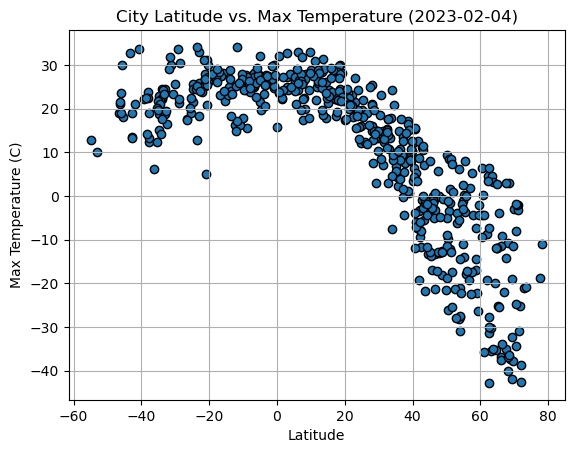

In [14]:
today = datetime.datetime.now().strftime("%Y-%m-%d")

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

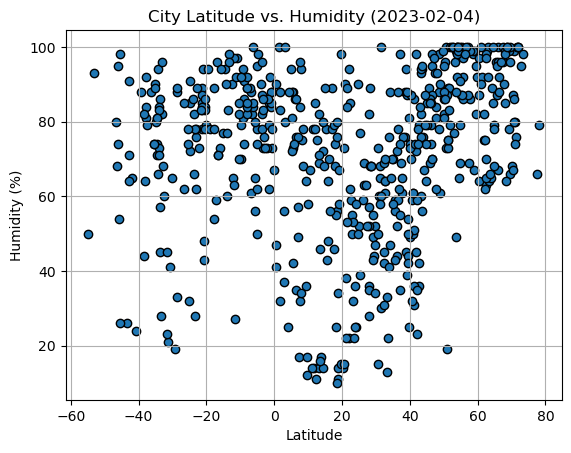

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

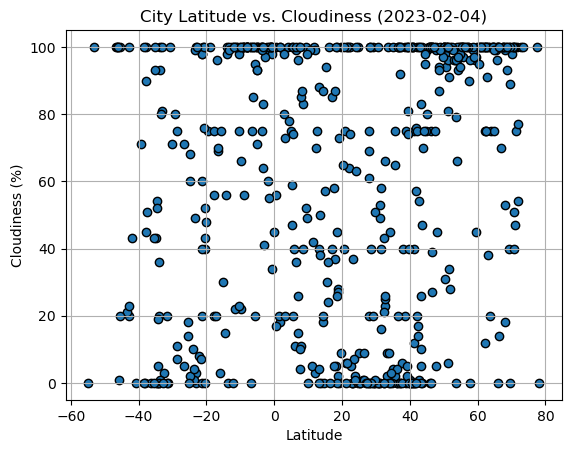

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

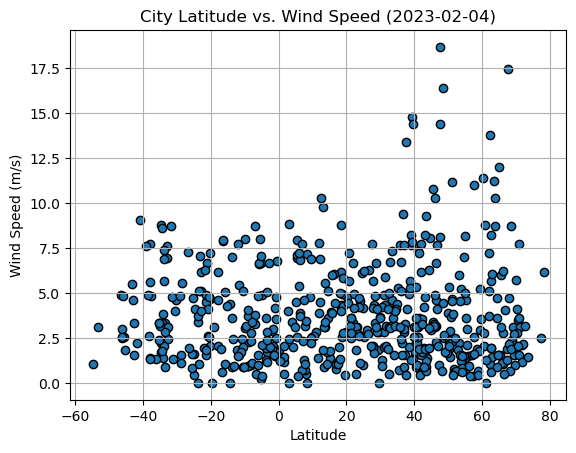

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
def linear_regression_plot(data, x_column, y_column):
   x = data[x_column]
   y = data[y_column]
   
   # Perform linear regression
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
   regress_values = x * slope + intercept
   line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
   
   # Plot the regression line
   plt.scatter(x, y)
   plt.plot(x, regress_values, "r-")

   # Annotate
   x_min, x_max = plt.xlim()
   y_min, y_max = plt.ylim()
   plt.annotate(line_eq, xy=(x_min, y_min), xycoords='data', fontsize=15, color="red")
   
   # Label the plot
   plt.xlabel("Latitude")
   plt.ylabel(y_column)
   plt.title(f"Hemisphere - {y_column} vs. Latitude - Linear Regression")
      
   #Print the R Value
   print(f"The r-value is: {rvalue}")

   # Show the plot
   plt.show()

In [48]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-27.71,63,75,1.03,CA,1675541180
1,brae,60.3964,-1.3530,6.34,64,100,11.38,GB,1675541564
4,albany,42.6001,-73.9662,-11.77,42,54,0.89,US,1675540920
6,dangara,29.6799,75.8931,13.40,52,0,2.84,IN,1675541679
9,ilulissat,69.2167,-51.1000,-18.99,78,40,3.09,GL,1675541232


In [60]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,faanui,-16.4833,-151.7500,27.47,71,69,7.89,PF,1675541249
3,busselton,-33.6500,115.3333,23.51,45,93,3.33,AU,1675541203
5,mar del plata,-38.0023,-57.5575,23.79,64,0,7.72,AR,1675541014
7,castro,-24.7911,-50.0119,21.52,85,60,4.12,BR,1675541015
8,atuona,-9.8000,-139.0333,25.68,79,22,8.01,PF,1675541203


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.857962453450886


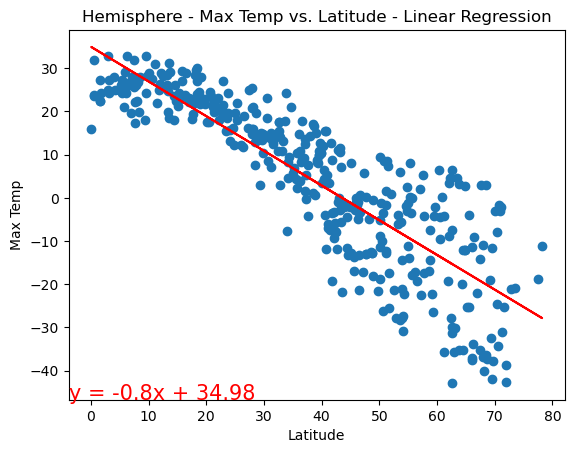

In [65]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r-value is: 0.41152887563634816


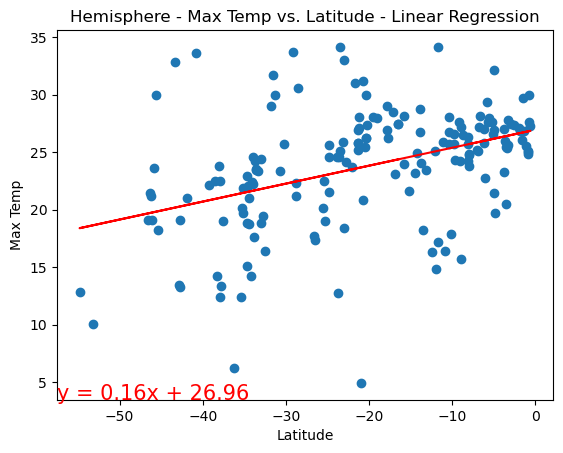

In [66]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and maximum temperature in the northern hemisphere (-0.85 as I am writing this on 2/4/23), while there is weak positive correlation for the southern hemisphere (0.41). Temperatures lower in relationship to the North and South poles, though this data indicates a clearer correlation in the Northern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4633291857741597


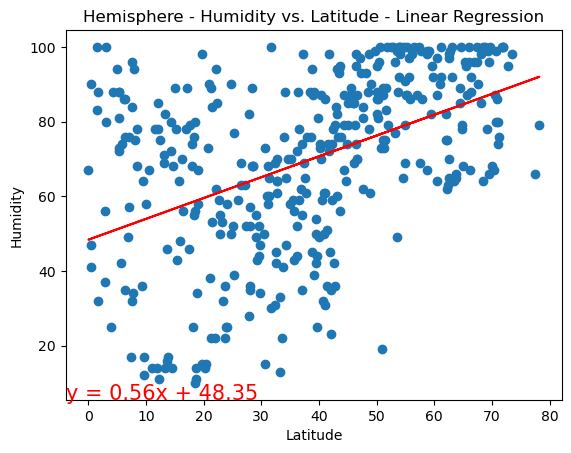

In [67]:
# Northern Hemisphere Humidity vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: 0.27788611246889094


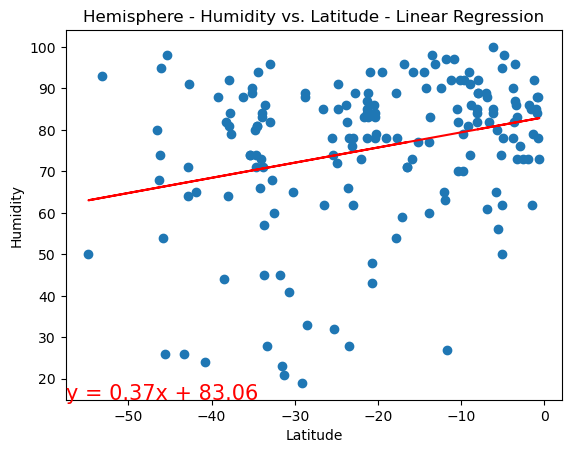

In [68]:
# Southern Hemisphere Humidity vs. Latitude Linear Regression Plot
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** The Northern and Southern hemispheres show a weak positive correlation for humidity vs. latitude, with respective R values of 0.46 and 0.27. This suggests that as you move away from the equator there may be a little more humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.3187688081952118


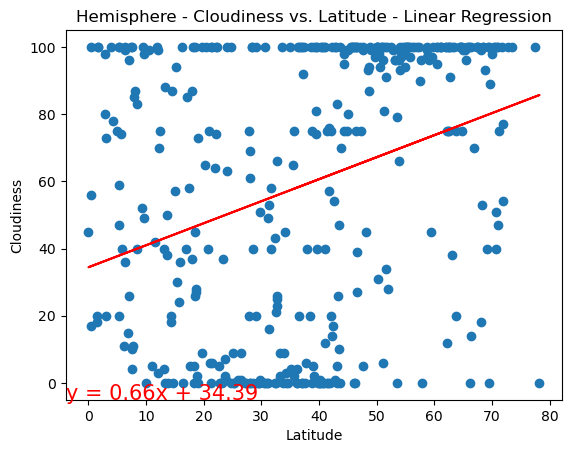

In [69]:
# Northern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.3827178690094084


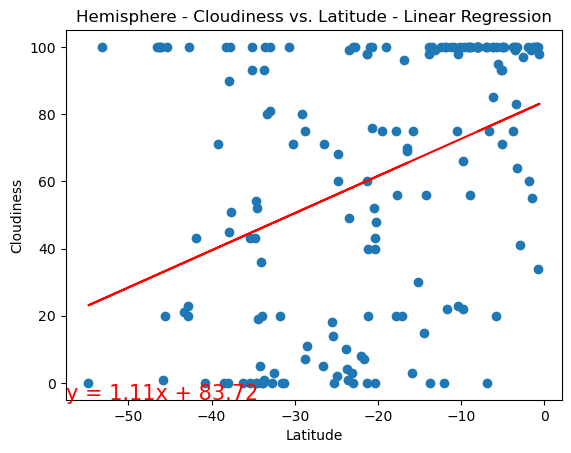

In [70]:
# Southern Hemisphere Cloudiness vs. Latitude Linear Regression Plot
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** The Northern and Southern hemispheres show a weak positive correlation for cloudiness vs. latitude, with respective R values of 0.31 and 0.38. This suggests that as you move away from the equator there may be a little more cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.025576124059043137


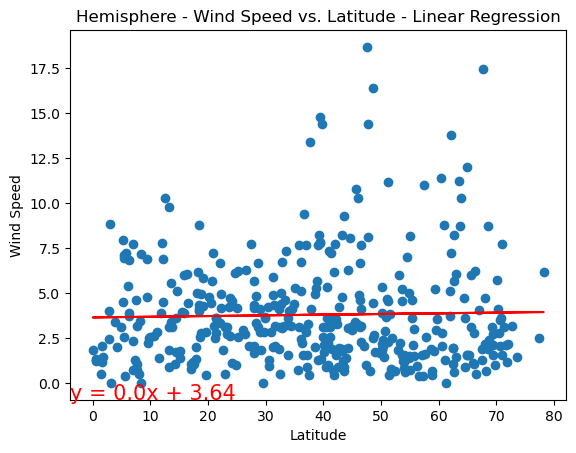

In [71]:
# Northern Hemisphere Windspeed vs. Latitude Linear Regression Plot
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.10215200052100365


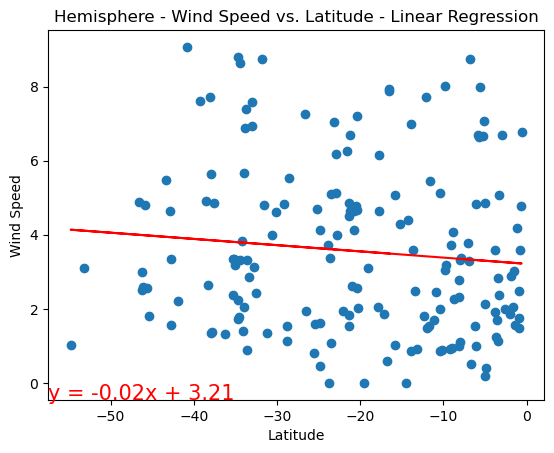

In [72]:
# Southern Hemisphere Wind Speed vs. Latitude Linear Regression Plot
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** The Northern and Southern hemispheres show very week correlations of wind speed vs. latitude, with respective R values of 0.025 and -0.10. This suggests that latitude has little to no effect on windspeed. 